<a href="https://colab.research.google.com/github/thor4/neuralnets/blob/master/projects/1-CNN/step_5_generate_figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize results

## 1: Load confidence & accuracy results
Run the cell to download a zip file from OSF then extract the following excel spreadsheets: `results_behavioral.xlsx`, `results_cifar10.xlsx`, `results_van3.xlsx`, and `results_vgg16-raw_conf.xlsx` into the current directory.

In [1]:
# @title Download results

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping `Confidence & accuracy results`...")
name = 'conf_acc_results'
fname = f"{name}.zip"
url = f"https://osf.io/xsf62/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping `Behavioral results`...
Download completed.


These were the average confidence and accuracy results of the VGG16, CIFAR10 and Gabor models. The CIFAR10 and Gabor models used a vanilla CNN architecture. The VGG16 & CIFAR10 used transfer learning to fine-tune their top layers for the Gabor classification task. The Gabor model was trained specifically for the Gabor classifaction task. The behavioral results are also included and comprise the average confidence and accuracy results across 55 subjects.

In [1]:
# @title Download behavioral results matlab file

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping `Behavioral results matlab file`...")
name = 'behavioral_results'
fname = f"{name}.zip"
url = f"https://osf.io/wsg26/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping `Behavioral results matlab file`...
Download completed.


The file is comprised of a 55x3x3 matrix labeled accuracy, a 55x3x3 matrix named confidence, and a vector of length 55 named subjects. The subjects vector contains the id of the subject data used. The accuracy matrix contains how accurate each subject was for each of 3 tilt and 3 contrast combinations in a subject x tilt x contrast shape. The confidence matrix contains the same thing, but has confidence values instead.

Load necessary libraries.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

In [5]:
results = loadmat('subject_results_sub_tilt_cont.mat')
results.keys()

dict_keys(['__header__', '__version__', '__globals__', 'accuracy', 'confidence', 'subjects'])

Extract confidence and accuracy.

In [6]:
accuracy = results['accuracy']
confidence = results['confidence']

In [42]:
confidence.shape

(55, 3, 3)

How many total samples are there (55x3x3)?

In [14]:
np.count_nonzero(confidence)

495

Repeat the tilt array 3 times for all conditions (9) then 55 times for all subjects.

In [20]:
#d = {'col1': [1, 2], 'col2': [3, 4]}

#beh_tilts = np.array([[1,2],[3,4]])
beh_tilts = np.array([1,1,1,2,2,2,3,3,3])
all_beh_tilts = np.tile(beh_tilts, 55)
print(all_beh_tilts)
print(all_beh_tilts.shape)

[1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1
 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1
 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1
 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2
 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2
 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2
 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3
 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3
 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3
 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1
 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1
 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1
 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2
 2 2 3 3 3 1 1 1 2 2 2 3 

Do the same for contrast.

In [21]:
beh_contrast = np.array([1,2,3])
all_beh_contrast = np.tile(beh_contrast, 165)
print(all_beh_contrast)
print(all_beh_contrast.shape)

[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3
 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3
 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3
 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3
 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 

In [30]:
accuracy.shape

(55, 3, 3)

In [41]:
accuracy[1,:,:]

array([[0.53, 0.54, 0.5 ],
       [0.52, 0.53, 0.58],
       [0.69, 0.73, 0.7 ]])

Confirm the flatten operation is unrolling accuracy first by subject (1st dim), then by tilt (2nd dim), then by contrast (3rd dim). `accuracy` is subject x tilt x contrast

In [40]:
test2 = accuracy.flatten(order='C')
test2

array([0.64, 0.69, 0.7 , 0.65, 0.79, 0.84, 0.84, 0.95, 0.95, 0.53, 0.54,
       0.5 , 0.52, 0.53, 0.58, 0.69, 0.73, 0.7 , 0.54, 0.57, 0.67, 0.6 ,
       0.66, 0.77, 0.78, 0.85, 0.9 , 0.62, 0.54, 0.57, 0.63, 0.68, 0.71,
       0.82, 0.74, 0.79, 0.52, 0.58, 0.57, 0.53, 0.63, 0.57, 0.6 , 0.58,
       0.71, 0.61, 0.64, 0.69, 0.63, 0.76, 0.8 , 0.81, 0.92, 0.95, 0.62,
       0.61, 0.54, 0.57, 0.62, 0.68, 0.77, 0.75, 0.78, 0.55, 0.61, 0.68,
       0.63, 0.67, 0.72, 0.7 , 0.83, 0.88, 0.58, 0.62, 0.7 , 0.6 , 0.65,
       0.78, 0.79, 0.87, 0.97, 0.47, 0.65, 0.71, 0.56, 0.8 , 0.75, 0.73,
       0.98, 0.95, 0.57, 0.51, 0.66, 0.64, 0.64, 0.73, 0.74, 0.8 , 0.82,
       0.57, 0.59, 0.55, 0.69, 0.71, 0.7 , 0.81, 0.81, 0.85, 0.53, 0.6 ,
       0.53, 0.55, 0.66, 0.52, 0.55, 0.6 , 0.67, 0.57, 0.6 , 0.64, 0.64,
       0.6 , 0.64, 0.74, 0.85, 0.86, 0.6 , 0.6 , 0.67, 0.58, 0.8 , 0.8 ,
       0.86, 0.91, 0.91, 0.59, 0.71, 0.72, 0.67, 0.86, 0.87, 0.79, 0.92,
       0.95, 0.6 , 0.57, 0.64, 0.49, 0.6 , 0.72, 0.

In [44]:
df_beh = pd.DataFrame(columns=['Tilt','Contrast','Accuracy','Confidence']) #initialize dataframe
df_beh['Tilt'] = all_beh_tilts
df_beh['Contrast'] = all_beh_contrast
df_beh['Accuracy'] = accuracy.flatten(order='C')
df_beh['Confidence'] = confidence.flatten(order='C')
df_beh.head()

,Tilt,Contrast,Accuracy,Confidence
0,1,1,0.64,1.90
1,1,2,0.69,1.87
2,1,3,0.70,2.18
3,2,1,0.65,1.94
4,2,2,0.79,1.95


Confirm that the third subject's data displays in dataframe.

In [49]:
df_beh[18:27] #subject 3 (every 9)

,Tilt,Contrast,Accuracy,Confidence
18,1,1,0.54,1.32
19,1,2,0.57,1.44
20,1,3,0.67,1.68
21,2,1,0.60,1.29
22,2,2,0.66,1.51
23,2,3,0.77,1.73
24,3,1,0.78,1.44
25,3,2,0.85,1.64
26,3,3,0.90,2.05


In [50]:
print(accuracy[2,:,:])
print(confidence[2,:,:])

[[0.54 0.57 0.67]
 [0.6  0.66 0.77]
 [0.78 0.85 0.9 ]]
[[1.32 1.44 1.68]
 [1.29 1.51 1.73]
 [1.44 1.64 2.05]]


This looks good.

Load the spreadsheets into pandas dataframe.

In [25]:
df_beh = pd.read_excel("results_behavioral.xlsx") #mobilenetv2 logits
df_cif = pd.read_excel("results_cifar10.xlsx") #vanilla logits
df_van3 = pd.read_excel("results_van3.xlsx") #vanilla logits
df_vgg = pd.read_excel("results_vgg16-raw_conf.xlsx") #vanilla logits
print(df_beh.head())
print(df_cif.head())
print(df_van3.head())
print(df_vgg.head())

   Tilt  Contrast  Accuracy  Confidence
0   1.0         1  0.558909    2.058364
1   NaN         2  0.587818    2.251273
2   NaN         3  0.609091    2.465091
3   2.0         1  0.589455    2.080727
4   NaN         2  0.667091    2.295091
   Tilt  Contrast  Accuracy  Confidence
0   0.1      0.30     0.520    0.688855
1   NaN      0.45     0.511    0.683615
2   NaN      1.00     0.526    0.742383
3   0.2      0.30     0.497    0.696570
4   NaN      0.45     0.503    0.697424
   Tilt  Contrast  Accuracy  Confidence
0   0.1      0.30     0.650    1.112273
1   NaN      0.45     0.699    1.239503
2   NaN      1.00     0.835    1.958911
3   0.2      0.30     0.751    1.232105
4   NaN      0.45     0.858    1.678815
   Tilt  Contrast  Accuracy  Confidence
0   0.1      0.30     0.616    0.495122
1   NaN      0.45     0.574    0.544343
2   NaN      1.00     0.536    1.197594
3   0.2      0.30     0.598    0.483895
4   NaN      0.45     0.617    0.584853


In [26]:
df_beh['Tilt']

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
5    NaN
6    3.0
7    NaN
8    NaN
Name: Tilt, dtype: float64

Set the NaN indices for behavior results.

In [27]:
df_nanidx = [1,2,4,5,7,8]

In [30]:
print(df_cif['Tilt'])
print(df_van3['Tilt'])
print(df_vgg['Tilt'])

0     0.1
1     NaN
2     NaN
3     0.2
4     NaN
5     NaN
6     0.4
7     NaN
8     NaN
9     0.8
10    NaN
11    NaN
12    1.6
13    NaN
14    NaN
15    3.2
16    NaN
17    NaN
Name: Tilt, dtype: float64
0     0.1
1     NaN
2     NaN
3     0.2
4     NaN
5     NaN
6     0.4
7     NaN
8     NaN
9     0.8
10    NaN
11    NaN
12    1.6
13    NaN
14    NaN
15    3.2
16    NaN
17    NaN
Name: Tilt, dtype: float64
0     0.1
1     NaN
2     NaN
3     0.2
4     NaN
5     NaN
6     0.4
7     NaN
8     NaN
9     0.8
10    NaN
11    NaN
12    1.6
13    NaN
14    NaN
15    3.2
16    NaN
17    NaN
Name: Tilt, dtype: float64


Set the NaN indices for model results.

In [31]:
df_nanidx_mod = [1,2,4,5,7,8,10,11,13,14,16,17]

Remove all the NaNs.

In [33]:
df_beh.loc[df_nanidx,'Tilt'] = [1.0,1.0,2.0,2.0,3.0,3.0]
df_cif.loc[df_nanidx_mod,'Tilt'] = [0.1,0.1,0.2,0.2,0.4,0.4,0.8,0.8,1.6,1.6,3.2,3.2]
df_van3.loc[df_nanidx_mod,'Tilt'] = [0.1,0.1,0.2,0.2,0.4,0.4,0.8,0.8,1.6,1.6,3.2,3.2]
df_vgg.loc[df_nanidx_mod,'Tilt'] = [0.1,0.1,0.2,0.2,0.4,0.4,0.8,0.8,1.6,1.6,3.2,3.2]

In [34]:
print(df_beh['Tilt'])
print(df_vgg['Tilt'])

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
5    2.0
6    3.0
7    3.0
8    3.0
Name: Tilt, dtype: float64
0     0.1
1     0.1
2     0.1
3     0.2
4     0.2
5     0.2
6     0.4
7     0.4
8     0.4
9     0.8
10    0.8
11    0.8
12    1.6
13    1.6
14    1.6
15    3.2
16    3.2
17    3.2
Name: Tilt, dtype: float64


In [36]:
df_cif.head()

,Tilt,Contrast,Accuracy,Confidence
0,0.1,0.30,0.520,0.688855
1,0.1,0.45,0.511,0.683615
2,0.1,1.00,0.526,0.742383
3,0.2,0.30,0.497,0.696570
4,0.2,0.45,0.503,0.697424


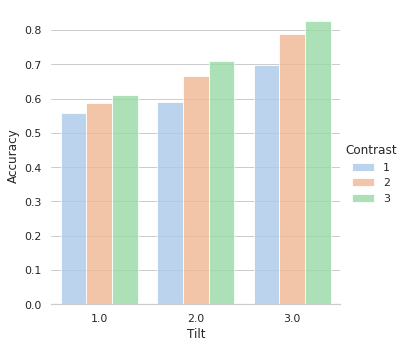

In [45]:
sns.set_theme(style="whitegrid", palette="pastel")

# Draw a nested boxplot to show bills by day and time
#sns.boxplot(x="Tilt", y="Accuracy", hue="Contrast", data=df_beh)
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_beh, kind="bar",
    x="Tilt", y="Accuracy", hue="Contrast",
    ci="sd", palette="pastel", alpha=.8, )
g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")

# STOPPED HERE: NEED RAW DATA FOR CONF INT. LOAD MAT FILE

## 2: Extract confidence and accuracy

In [ ]:
accuracy = results['accuracy']

Let's check the first subject's accuracy for all 9 tilt x contrast combinations.

In [ ]:
accuracy[0] 

array([[0.64, 0.69, 0.7 ],
       [0.65, 0.79, 0.84],
       [0.84, 0.95, 0.95]])

Now, let's average over all subjects to find the mean accuracy for each tilt x contrast condition.

In [ ]:
avg_acc = np.average(accuracy, axis=0)
avg_acc

array([[0.55890909, 0.58781818, 0.60909091],
       [0.58945455, 0.66709091, 0.70872727],
       [0.69890909, 0.78672727, 0.82636364]])

Do the same for confidence.

In [ ]:
avg_conf = np.average(results['confidence'], axis=0)
avg_conf

array([[2.05836364, 2.25127273, 2.46509091],
       [2.08072727, 2.29509091, 2.53545455],
       [2.17872727, 2.48781818, 2.792     ]])

In [ ]:
avg_acc.flatten() #unroll avg acc matrix

array([0.55890909, 0.58781818, 0.60909091, 0.58945455, 0.66709091,
       0.70872727, 0.69890909, 0.78672727, 0.82636364])

## 3: Create dataframe of results and save to Excel

Create a dataframe containing all average results with tilt x contrast assignments.

In [ ]:
df_results = pd.DataFrame({'Accuracy':avg_acc.flatten(),
                           'Confidence':avg_conf.flatten()})
df_results = df_results.assign(Tilt = [1, 1, 1, 2, 2, 2, 3, 3, 3],
                         Contrast = [1, 2, 3, 1, 2, 3, 1, 2, 3])

In [ ]:
df_results

,Accuracy,Confidence,Tilt,Contrast
0,0.558909,2.058364,1,1
1,0.587818,2.251273,1,2
2,0.609091,2.465091,1,3
3,0.589455,2.080727,2,1
4,0.667091,2.295091,2,2
5,0.708727,2.535455,2,3
6,0.698909,2.178727,3,1
7,0.786727,2.487818,3,2
8,0.826364,2.792000,3,3


Group the results by tilt and contrast for a clearer visualization.

In [ ]:
df_results_groupbyta = df_results.reset_index().set_index(['Tilt','Contrast'])
del df_results_groupbyta['index']
df_results_groupbyta

Accuracy  Confidence
Tilt Contrast                      
1    1         0.558909    2.058364
     2         0.587818    2.251273
     3         0.609091    2.465091
2    1         0.589455    2.080727
     2         0.667091    2.295091
     3         0.708727    2.535455
3    1         0.698909    2.178727
     2         0.786727    2.487818
     3         0.826364    2.792000

Save to disk.

In [ ]:
results_excel_filepath = os.path.join(os.getcwd(), 'results_behavioral.xlsx') #prep path to save to
df_results_groupbyta.to_excel(results_excel_filepath, index=True) #save to disk